# Exploratory data analysis of Pravega '17

### The Dataset:

Pravega online registrations dataset. MS Excel format.

Let's import the required libraries first.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

## Importing data and cleaning

In [2]:
df = pd.read_excel('Online Registrations Collegefever 2017.xlsx')
df.head()

,Name,Email,ContactNo,College / City Name,Ticket name,TCFRegistrationId,TicketPrice,RegisteredOn
0,BISHWAJEET KUMAR SINGH,bksinghdhn@gmail.com,9206821450,BANGALORE,General Registration,5582JE5,205,Wed Nov 16 17:19:22 IST 2016
1,N S Chiranjeevi,ns.chiranjeevi@students.iisertirupati.ac.in,8792877680,Indian Institute of Science Education and Rese...,General Registration,3PPAHDT,205,Tue Nov 22 08:59:26 IST 2016
2,N S Chiranjeevi,ns.chiranjeevi@students.iisertirupati.ac.in,8792877680,Indian Institute of Science Education and Rese...,Big Data,3PPAHDT,1500,Tue Nov 22 08:59:26 IST 2016
3,Shashank K M,shashank009.95@gmail.com,9880711530,"St. Joseph College, Bangalore",Big Data,PSAXT4E,1500,Wed Nov 30 20:54:34 IST 2016
4,Rohan Pai M,pairohan20@gmail.com,9480655098,St.Joseph College Bangalore,Big Data,5XHV4ZX,1500,Wed Nov 30 22:26:03 IST 2016


In [3]:
df.describe()

,ContactNo,TicketPrice
count,1.577000e+03,1577.000000
mean,8.999055e+09,1070.783133
std,8.341585e+08,493.027339
min,9.886968e+08,205.000000
25%,8.357879e+09,600.000000
50%,9.179432e+09,1200.000000
75%,9.632818e+09,1500.000000
max,9.989870e+09,1500.000000


## Initial thoughts

The data is quite rich, but there are some things we don't really need. (IMO)

Let's drop the contact no.

Also, notice 1 and 2. They differ only in the Ticket name column. Now, for some context: Pravega '17 had general registration compulsory for workshop attendees too.

And do we really need email ids? Not very interesting. Let's drop it.

In [4]:
df_lesser = df.drop(axis=1, labels=['ContactNo', 'Email'])

#change index to TCFRegistrationId

df_lesser = df_lesser.set_index('TCFRegistrationId')
df_lesser.head()

,Name,College / City Name,Ticket name,TicketPrice,RegisteredOn
TCFRegistrationId,,,,,
5582JE5,BISHWAJEET KUMAR SINGH,BANGALORE,General Registration,205,Wed Nov 16 17:19:22 IST 2016
3PPAHDT,N S Chiranjeevi,Indian Institute of Science Education and Rese...,General Registration,205,Tue Nov 22 08:59:26 IST 2016
3PPAHDT,N S Chiranjeevi,Indian Institute of Science Education and Rese...,Big Data,1500,Tue Nov 22 08:59:26 IST 2016
PSAXT4E,Shashank K M,"St. Joseph College, Bangalore",Big Data,1500,Wed Nov 30 20:54:34 IST 2016
5XHV4ZX,Rohan Pai M,St.Joseph College Bangalore,Big Data,1500,Wed Nov 30 22:26:03 IST 2016


### Time Series data

Look at the last column. Time series data is always interesting. Let's look at what type it is.

In [5]:
type(df_lesser.RegisteredOn[0])

str

It's a string. We need to convert it into some sensible format.

In [6]:
df_lesser.RegisteredOn = pd.to_datetime(df_lesser.RegisteredOn).apply(lambda x: x.tz_localize('Asia/Kolkata'))

In [7]:
df_lesser.head()

,Name,College / City Name,Ticket name,TicketPrice,RegisteredOn
TCFRegistrationId,,,,,
5582JE5,BISHWAJEET KUMAR SINGH,BANGALORE,General Registration,205,2016-11-16 11:49:22+05:30
3PPAHDT,N S Chiranjeevi,Indian Institute of Science Education and Rese...,General Registration,205,2016-11-22 03:29:26+05:30
3PPAHDT,N S Chiranjeevi,Indian Institute of Science Education and Rese...,Big Data,1500,2016-11-22 03:29:26+05:30
PSAXT4E,Shashank K M,"St. Joseph College, Bangalore",Big Data,1500,2016-11-30 15:24:34+05:30
5XHV4ZX,Rohan Pai M,St.Joseph College Bangalore,Big Data,1500,2016-11-30 16:56:03+05:30


In [8]:
type(df_lesser.RegisteredOn[1])

pandas._libs.tslib.Timestamp

In [9]:
df_lesser.tail()

,Name,College / City Name,Ticket name,TicketPrice,RegisteredOn
TCFRegistrationId,,,,,
88354MD,Rishabh Mittal,Ms Ramaiah university of applied sciences,General Registration,205,2017-01-21 08:57:30+05:30
88354MD,Rakshit desurkar,Ms Ramaiah university of applied sciences,General Registration,205,2017-01-21 08:57:30+05:30
88354MD,Sahaj Rai,Ms Ramaiah university of applied sciences,General Registration,205,2017-01-21 08:57:30+05:30
CJCFSUK,Veera Vardhan,BMSCE/bangalore,General Registration,205,2017-01-21 09:41:27+05:30
VPZVEGX,Tharun Kumar Reddy,Bangalore,General Registration,205,2017-01-21 14:16:14+05:30


## Preliminary analysis

Alright. The boring stuff is kinda done. The data is now in a nice format in df_lesser. And it is sorted by time. Now, to get some more info about our data.

In [10]:
df_lesser.RegisteredOn.describe()

count                          1577
unique                          886
top       2017-01-05 11:17:43+05:30
freq                             21
Name: RegisteredOn, dtype: object

In [11]:
df_lesser.TicketPrice.describe()

count    1577.000000
mean     1070.783133
std       493.027339
min       205.000000
25%       600.000000
50%      1200.000000
75%      1500.000000
max      1500.000000
Name: TicketPrice, dtype: float64

In [12]:
df_lesser['Ticket name'].describe()

count                     1577
unique                      13
top       General Registration
freq                       255
Name: Ticket name, dtype: object

In [13]:
df_lesser['Ticket name'].unique()

array(['General Registration', 'Big Data', 'Cyber Forensics',
       'Internet of Things', 'Android Controlled Robotics',
       'Game Development using Virtual Reality',
       'Automobile and IC Engine Design', 'Theatre Improv',
       'Touch and Augmented Reality', 'Drone Photography',
       'Quadcopter Workshop', 'Pravega Accommodation for 2 nights',
       'Spray Paint Art'], dtype=object)

In [14]:
no_transactions = df_lesser.index.unique().size # Number of transactions
no_transactions

887

In [15]:
df_lesser.TicketPrice.unique()

array([ 205, 1500, 1200, 1350,  300, 1100, 1000,  500,  800,  600])

In [16]:
no_ppl = df_lesser.Name.unique().size
no_ppl

1387

In [17]:
no_tickets = df_lesser.shape[0]
no_tickets

1577

1577 total tickets, of which 1387 unique people. Money paid in a total of 887 transactions.

In [18]:
wksp_count = df_lesser[(df_lesser['Ticket name'] != 'General Registration')
                       & (df_lesser['Ticket name'] != 'Pravega Accommodation for 2 nights') 
                      ]['Ticket name'].value_counts()
wksp_count.name = '# of Registrations'
wksp_count

Internet of Things                        196
Big Data                                  194
Quadcopter Workshop                       152
Cyber Forensics                           146
Automobile and IC Engine Design           129
Android Controlled Robotics               124
Touch and Augmented Reality               108
Game Development using Virtual Reality     57
Theatre Improv                             27
Spray Paint Art                            12
Drone Photography                          11
Name: # of Registrations, dtype: int64

## Workshop popularity

Graph time!

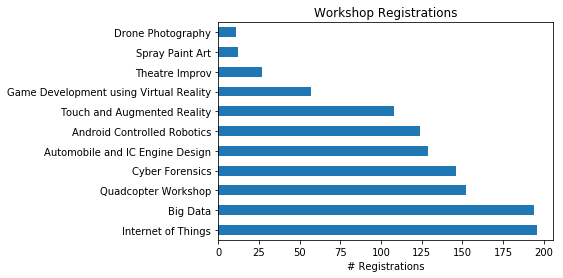

In [19]:
%matplotlib inline
wksp_count.plot(kind = 'barh')

plt.xlabel('# Registrations')
plt.title('Workshop Registrations')
plt.show()

Is this somehow related to the price of workshops?

[]

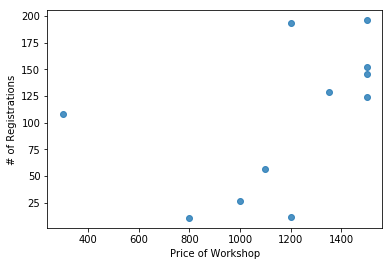

In [20]:
prices = df_lesser.drop_duplicates('Ticket name').set_index('Ticket name')
prices = prices[['TicketPrice']]
prices = prices.drop(['General Registration', 'Pravega Accommodation for 2 nights'])

prices = prices.TicketPrice
prices.name = 'Price of Workshop'

sns.regplot(prices, wksp_count, fit_reg=False)
plt.plot()

## Time-series analysis

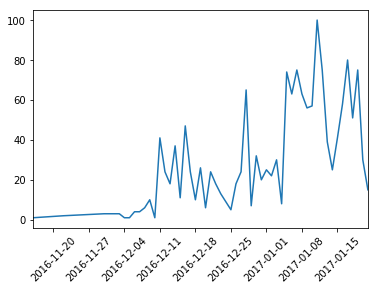

In [21]:
df_dt = df_lesser.set_index('RegisteredOn')[['TicketPrice', 'Ticket name']]

df_dt['Ticket name'].groupby(df_dt.index.date).count().plot()
plt.tick_params('x', rotation = 45)
plt.show()

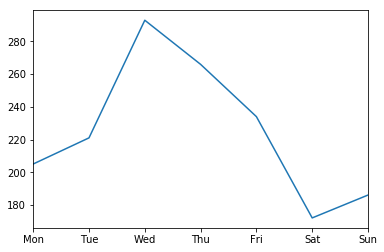

In [22]:
kkk = df_dt['Ticket name'].groupby(df_dt.index.weekday).count()
kkk.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
kkk.plot()
plt.show()

## Geographical data analysis

In [23]:
geo_data = df_lesser.set_index('Ticket name')['College / City Name']
names = geo_data.unique()
names[1:10]

array(['Indian Institute of Science Education and Research Tirupati',
       'St. Joseph College, Bangalore', 'St.Joseph College Bangalore',
       "St.Joseph's College,Bangalore",
       'National Institute of Technology Meghalaya',
       'Vidyavardhaka College of Engineering Mysore',
       "St. Joseph's College(Autonomus)", 'Bangalore',
       'RVR&JC COLLEGE OF ENGINEERING , GUNTUR'], dtype=object)

As you may have noticed, the data is horrendous. People have written the name college name in multiple unique ways 

(Case in point: 'St. Joseph College, Bangalore', 'St.Joseph College Bangalore', "St.Joseph's College,Bangalore")

Time for some long, painful data cleaning.

## More data cleaning.

Time to get our hands dirty with some regular expressions.

### Import the re library

In [24]:
import re

And apply it for college names and locations. Every single one.

Let's look at the city names, first.

In [25]:
cities = re.compile(r'[/,][a-zA-Z .]*')

for name in names:
    for city in cities.finditer(name):
        print(city, name)

<_sre.SRE_Match object; span=(18, 29), match=', Bangalore'> St. Joseph College, Bangalore
<_sre.SRE_Match object; span=(19, 29), match=',Bangalore'> St.Joseph's College,Bangalore
<_sre.SRE_Match object; span=(30, 38), match=', GUNTUR'> RVR&JC COLLEGE OF ENGINEERING , GUNTUR
<_sre.SRE_Match object; span=(19, 31), match=', Bangalore.'> St.Joseph's College, Bangalore.
<_sre.SRE_Match object; span=(11, 21), match='/BANGALORE'> ST JOSEPHS /BANGALORE
<_sre.SRE_Match object; span=(31, 39), match=', GUNTUR'> RVR & JC COLLEGE OF ENGINEERING, GUNTUR
<_sre.SRE_Match object; span=(30, 38), match=', GUNTUR'> RVR&JC COLLEGE OF ENGINNERING , GUNTUR
<_sre.SRE_Match object; span=(42, 53), match='/ Bangalore'> Sir M Visveshvarya Institute Of Technology/ Bangalore
<_sre.SRE_Match object; span=(34, 41), match='/Mysore'> Amrita School of Arts and Sciences/Mysore
<_sre.SRE_Match object; span=(29, 36), match='/guntur'> Rvr&jc college of engineering/guntur
<_sre.SRE_Match object; span=(29, 36), match='/guntur

So we have: [cities]

Bangalore[Bengaluru],  Guntur, Mysore [Mysuru, YSORE], Mangalore, Coimbatore, Chennai, Chowdavaram(=guntur), Hyderabad, NARASARAOPETA, Bangalore rural, Bareilly, Anantapur [ANANTAPUR, ANANTHAPUARAMU, ANANTHAPURAMU ], Ghaziabad, Tirupati, Satna, Hassan, Machilipatnam, Doddaballapur[a], Nagdenahalli, Vinjampadu, Trichy,  Puducherry, Salem, Manipal, Bijapur, Kollam, Sivakasi, Meghalaya, 

In [26]:
locations = pd.DataFrame(geo_data)
locations['City'] = None
locations = locations.rename(columns = {'College / City Name': 'College'})

In [27]:
locations.loc[locations['College'].str.contains('[Bb][Aa][Nn][Gg][Aa][Ll][Oo][Rr][Ee]'), 'City'] = 'Bangalore'

In [28]:
locations.loc[locations['College'].str.contains('[Bb][Ee][Nn][Gg][Aa][Ll][Uu][Rr][Uu]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('[Gg][Uu][Nn][Tt][Uu][Rr]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Mm][Yy][Ss][Oo][Rr][Ee]'), 'City'] = 'Mysore'
locations.loc[locations['College'].str.contains('[Mm][Yy][Ss][Uu][Rr][Uu]'), 'City'] = 'Mysore'
locations.loc[locations['College'].str.contains('[Mm][Aa][Nn][Gg][Aa][Ll][Oo][Rr][Ee]'), 'City'] = 'Mangalore'
locations.loc[locations['College'].str.contains('[Mm][Ee][Nn][Gg][Aa][Ll][Uu][Rr][Uu]'), 'City'] = 'Mangalore'
locations.loc[locations['College'].str.contains('[Cc][Oo][Ii][Mm][Bb][Aa][Tt][Oo][Rr][Ee]'), 'City'] = 'Coimbatore'
locations.loc[locations['College'].str.contains('[Cc][Hh][Ee][Nn][Nn][Aa][Ii]'), 'City'] = 'Chennai'
locations.loc[locations['College'].str.contains('CHOWDAVARAM'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Hh][Yy][Dd][Ee][Rr][Aa][Bb][Aa][Dd]'), 'City'] = 'Hyderabad'
locations.loc[locations['College'].str.contains('[Nn][Aa][Rr][Aa][Ss]'), 'City'] = 'Narasaraopeta'
locations.loc[locations['College'].str.contains('[Bb][Aa][Rr][Ee][Ii]'), 'City'] = 'Bareilly'
locations.loc[locations['College'].str.contains('[Aa][Nn][Aa][Nn][Tt]'), 'City'] = 'Anantapur'
locations.loc[locations['College'].str.contains('[Gg][Hh][Aa][Zz]'), 'City'] = 'Ghaziabad'
locations.loc[locations['College'].str.contains('[Tt][Ii][Rr][Uu][Pp]'), 'City'] = 'Tirupati'
locations.loc[locations['College'].str.contains('[Ss][Aa][Tt][Nn]'), 'City'] = 'Satna'
locations.loc[locations['College'].str.contains('[Hh][Aa][Ss][Ss]'), 'City'] = 'Hassan'
locations.loc[locations['College'].str.contains('[Mm][Aa][Cc][Hh][Ii]'), 'City'] = 'Machilipatnam'
locations.loc[locations['College'].str.contains('[Dd][Oo][Dd][Dd]'), 'City'] = 'Doddaballapur'
locations.loc[locations['College'].str.contains('[Nn][Aa][Gg][Dd]'), 'City'] = 'Nagdenahalli'
locations.loc[locations['College'].str.contains('[Vv][Ii][Nn][Jj]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Tt][Rr][Ii]'), 'City'] = 'Trichy'
locations.loc[locations['College'].str.contains('[Pp][Uu][Dd][Uu][Cc]'), 'City'] = 'Puducherry'
locations.loc[locations['College'].str.contains('[Ss][Aa][Ll][Ee]'), 'City'] = 'Salem'
locations.loc[locations['College'].str.contains('[Mm][Aa][Nn][Ii]'), 'City'] = 'Manipal'
locations.loc[locations['College'].str.contains('[Bb][Ii][Jj][Aa]'), 'City'] = 'Bijapur'
locations.loc[locations['College'].str.contains('[Kk][Oo][Ll][Ll]'), 'City'] = 'Kollam'
locations.loc[locations['College'].str.contains('[Ss][Ii][Vv][Aa]'), 'City'] = 'Sivakasi'

In [29]:
locations

,College,City
Ticket name,,
General Registration,BANGALORE,Bangalore
General Registration,Indian Institute of Science Education and Rese...,Tirupati
Big Data,Indian Institute of Science Education and Rese...,Tirupati
Big Data,"St. Joseph College, Bangalore",Bangalore
Big Data,St.Joseph College Bangalore,Bangalore
Big Data,"St.Joseph's College,Bangalore",Bangalore
Cyber Forensics,National Institute of Technology Meghalaya,None
Cyber Forensics,National Institute of Technology Meghalaya,None
Cyber Forensics,National Institute of Technology Meghalaya,None


Lots of cities left.

In [30]:
locations.City = locations.City.fillna('Unfilled')
locations[locations.City == 'Unfilled'].College.unique()

array(['National Institute of Technology Meghalaya',
       "St. Joseph's College(Autonomus)", "St. Joseph's College",
       'RVR&JC COLLEGE OF ENGINEERING', 'RVR&JC College of Engineering',
       'Sri Jayachamarajendra college of engineering',
       'BMS college of engineering', 'Vidya vikas college of engineering',
       'NITTE MEENAKSHI INSTITUTE OF TECHNOLOGY',
       'Sir M Visvesvaraya Institute Of Technology',
       'Sir M. Visvesvaraya Institute of Technology',
       'RVR@JC College of Engineering', 'RVR and JCCE',
       'R.V.R & J.C.COLLEGE OF ENGINEERING', 'RVR&JCCE',
       'Rvr&jc college of engineering', 'Bms college of engineering',
       'Bmsce', 'R.V.R&J.C CE', 'R.V.R&J.C C.E',
       'rvr&jc college of engineering', 'Rvr&jc College of engineering',
       'Chitradurga', 'Acharya institute of technology',
       'RVR &JC COLLEGE OF ENGINEERING', 'RVR & JC COLLEGE OF ENGINEERING',
       'Shridevi Institute Of Engineering & Technology- Tumkur',
       'R.V.R&J.C.

In [31]:
locations.loc[locations['College'].str.contains('St. ?[Jj]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('[Rr][Vv][Rr]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Bb][Mm][Ss]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('Sir M'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('Sri Jayachamarajendra'), 'City'] = 'Mysore'
locations.loc[locations['College'].str.contains('Sir M'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('IIT B'), 'City'] = 'Mumbai'
locations.loc[locations['College'].str.contains('bang'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('BELG'), 'City'] = 'Belgaum'
locations.loc[locations['College'].str.contains('VIJA'), 'City'] = 'Vijayapura'
locations.loc[locations['College'].str.contains('Tirua'), 'City'] = 'Tirupati'
locations.loc[locations['College'].str.contains('[Ss][Aa][Tt][Hh][Yy][Aa]'), 'City'] = 'Chennai'

In [32]:
locations[locations.City == 'Unfilled'].College.unique()

array(['National Institute of Technology Meghalaya',
       'Vidya vikas college of engineering',
       'NITTE MEENAKSHI INSTITUTE OF TECHNOLOGY',
       'R.V.R & J.C.COLLEGE OF ENGINEERING', 'R.V.R&J.C CE',
       'R.V.R&J.C C.E', 'Chitradurga', 'Acharya institute of technology',
       'Shridevi Institute Of Engineering & Technology- Tumkur',
       'R.V.R&J.C.COLLEGE OF ENGINEERING',
       'qis engineering college and technology',
       'Amrita School of Arts and Sciences',
       'Chalapathi Institute of Technology',
       'R.V.R & J.C. college of engineering',
       'R V R & J C College of Engineering',
       'M S RAMAIAH INSTITUTE OF TECHNOLOGY', 'IIT Madras',
       'BNM Institute of Technology',
       'Kallam haranadha reddy institute of technology',
       'Jntuk University College of Engineering Narsaraopet', 'JNTUK-UCEN',
       'ACHARYA INSTITUTE OF TECHNOLOGY', 'Gutntur', 'ITER Bhubaneswar',
       'ITER Bhubhaneshwar', 'R V College of Engineering', 'MSRIT',
       

In [33]:
locations.loc[locations['College'].str.contains('[Rr][ .][Vv][ .][Rr]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Mm][Ee][Gg][Hh][Aa]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('SS Institute of Medical Sciences'), 'City'] = 'Devanegere'
locations.loc[locations['College'].str.contains('SASTRA'), 'City'] = 'Thanjavur'

In [43]:
locations.loc[locations['City']=='Unfilled',  'City'] = 'Bangalore'

#Yes, This is where I lost my patience.

In [45]:
locations.groupby('City').count()

,College
City,
Anantapur,82
Bangalore,645
Bareilly,1
Belgaum,2
Bijapur,7
Chennai,51
Coimbatore,32
Devanegere,1
Doddaballapur,2


Nice. Now that we have our data,  we'll do something cool with it.

In [46]:
locations.to_csv('Location_data.csv')